<a href="https://colab.research.google.com/github/Midhilesh29/Monkai_notebooks/blob/master/Retinanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install dicttoxml

  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp36-none-any.whl size=17452 sha256=7b76a2fec426ed0065ba7b33ccde0234a792548e704b78886b9087c3e4add173
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml


In [0]:
import os
import numpy as np 
import cv2
import dicttoxml
import xml.etree.ElementTree as ET
from xml.dom.minidom import parseString
from tqdm import tqdm
import shutil
import json
import pandas as pd

In [0]:
root = "/content/drive/My Drive/Monkai/PRImA Layout Analysis Dataset";
img_dir = "images/Train";
anno_file = "train_labels.csv";

In [0]:
dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/annotations/";

In [0]:
if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + "/" + anno_file;

In [0]:
output_dataset_path = root;
output_image_folder = input_images_folder;
output_annotation_folder = annotations_path;

tmp = img_dir.replace("/", "");
output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
output_classes_file = output_annotation_folder + "/classes.txt";

In [0]:
if not os.path.isdir(output_annotation_folder):
    os.mkdir(output_annotation_folder);

In [0]:
df = pd.read_csv(input_annotations_path);
columns = df.columns

In [0]:
delimiter = " ";

In [0]:
list_dict = [];
anno = [];
for i in range(len(df)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    for j in range(len(tmp)//5):
        label = tmp[j*5+4];
        if(label not in anno):
            anno.append(label);
    anno = sorted(anno)
    
for i in tqdm(range(len(anno))):
    tmp = {};
    tmp["supercategory"] = "master";
    tmp["id"] = i;
    tmp["name"] = anno[i];
    list_dict.append(tmp);

anno_f = open(output_classes_file, 'w');
for i in range(len(anno)):
    anno_f.write(anno[i] + "\n");
anno_f.close();

100%|██████████| 9/9 [00:00<00:00, 14820.86it/s]


In [0]:
coco_data = {};
coco_data["type"] = "instances";
coco_data["images"] = [];
coco_data["annotations"] = [];
coco_data["categories"] = list_dict;
image_id = 0;
annotation_id = 0;


for i in tqdm(range(len(df))):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    image_in_path = input_images_folder + "/" + img_name;
    img = cv2.imread(image_in_path, 1);
    h, w, c = img.shape;

    images_tmp = {};
    images_tmp["file_name"] = img_name;
    images_tmp["height"] = h;
    images_tmp["width"] = w;
    images_tmp["id"] = image_id;
    coco_data["images"].append(images_tmp);
    

    for j in range(len(tmp)//5):
        x1 = int(tmp[j*5+0]);
        y1 = int(tmp[j*5+1]);
        x2 = int(tmp[j*5+2]);
        y2 = int(tmp[j*5+3]);
        label = tmp[j*5+4];
        annotations_tmp = {};
        annotations_tmp["id"] = annotation_id;
        annotation_id += 1;
        annotations_tmp["image_id"] = image_id;
        annotations_tmp["segmentation"] = [];
        annotations_tmp["ignore"] = 0;
        annotations_tmp["area"] = (x2-x1)*(y2-y1);
        annotations_tmp["iscrowd"] = 0;
        annotations_tmp["bbox"] = [x1, y1, x2-x1, y2-y1];
        annotations_tmp["category_id"] = anno.index(label);

        coco_data["annotations"].append(annotations_tmp)
    image_id += 1;

outfile =  open(output_annotation_file, 'w');
json_str = json.dumps(coco_data, indent=4);
outfile.write(json_str);
outfile.close();

100%|██████████| 467/467 [41:26<00:00,  5.77s/it]

In [0]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 3850 (delta 63), reused 60 (delta 32), pack-reused 3743
Receiving objects: 100% (3850/3850), 152.76 MiB | 28.98 MiB/s, done.
Resolving deltas: 100% (865/865), done.
Checking out files: 100% (4035/4035), done.


In [0]:
! cd Monk_Object_Detection/5_pytorch_retinanet/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-cp36-none-any.whl size=12422 sha256=d5b7e92b54e2174884d4d52cc5f18cc4774e5974ded5d154123ed9e7d25ea006
  Stored in directory: /root/.cache/pip/wheels/42/1e/a9/2a578ba9ad04e776e80bf0f70d8a7f4c29ec0718b92d8f6ccd
Successfully built efficientnet-pytorch
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp36-none-any.whl size=17452 sha256=84499d18e8655b6e51681275ccfff5fcba923b34a4a6ff70ca585c16c906f685
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml


In [0]:
input_annotations_path = root + "/" + anno_file;
df = pd.read_csv(input_annotations_path)

In [0]:
df.head()

Id                                             Labels
0  00000086.tif  2140 3184 2182 3209 page-number 1375 3191 2061...
1  00000087.tif  202 1934 803 1980 floating 877 1934 1149 1981 ...
2  00000089.tif  164 245 837 369 floating 163 377 837 896 parag...
3  00000090.tif  2 84 2174 156 heading 1618 1340 2306 1487 capt...
4  00000122.tif  71 1036 1128 1089 caption 73 1148 1135 1309 pa...

In [0]:
classlabels=[]
for i in range(df.shape[0]):
  tmp=df['Labels'][i].split(" ")
  for j in range(len(tmp)//5):
    classlabels.append(tmp[j*5+4])

Count of individual classes

**Observed**

class imbalance more number of paragraphs

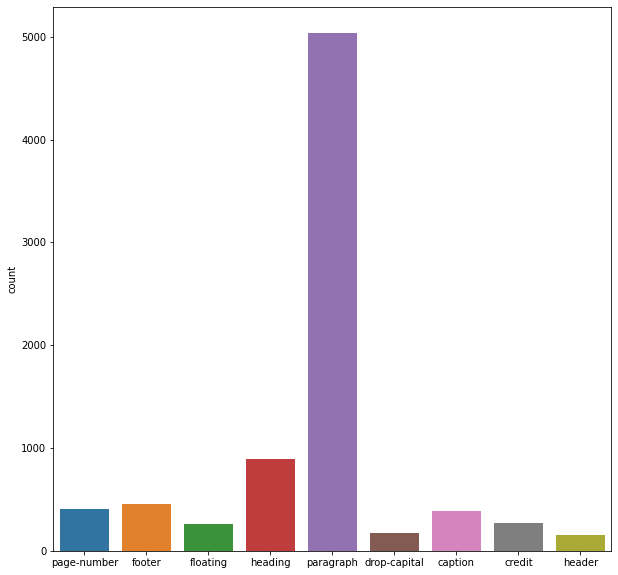

In [0]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sb.countplot(np.array(classlabels))

In [0]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [0]:
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 'Monk_Object_Detection/5_pytorch_retinanet/lib/']

In [0]:
from train_detector import Detector

In [0]:
gtf = Detector();

In [0]:
root_dir = "/content/drive/My Drive/Monkai";
set_dir = "imagesTrain";
coco_dir = "PRImA Layout Analysis Dataset"
img_dir="./"

In [0]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=4, use_gpu=True)

loading annotations into memory...
Done (t=3.88s)
creating index...
index created!
Num training images: 467


In [0]:
gtf.Model(model_name="resnet34");

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to ./resnet34-333f7ec4.pth


In [0]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, print_interval=20)

In [0]:
gtf.Train(num_epochs=5, output_model_name="final_model.pt");

Epoch: 0 | Iteration: 0 | Classification loss: 1.13156 | Regression loss: 1.07202 | Running loss: 2.20358
Epoch: 0 | Iteration: 20 | Classification loss: 0.52839 | Regression loss: 0.97400 | Running loss: 1.92880
Epoch: 0 | Iteration: 40 | Classification loss: 1.19981 | Regression loss: 0.91785 | Running loss: 1.71998
Epoch: 0 | Iteration: 60 | Classification loss: 12.27528 | Regression loss: 0.53377 | Running loss: 1.83904
Epoch: 0 | Iteration: 80 | Classification loss: 0.42510 | Regression loss: 0.67859 | Running loss: 1.65708
Epoch: 0 | Iteration: 100 | Classification loss: 0.30428 | Regression loss: 0.60611 | Running loss: 1.53158
Epoch: 1 | Iteration: 0 | Classification loss: 0.24000 | Regression loss: 0.45649 | Running loss: 1.43928
Epoch: 1 | Iteration: 20 | Classification loss: 0.39306 | Regression loss: 0.66157 | Running loss: 1.34501
Epoch: 1 | Iteration: 40 | Classification loss: 0.35656 | Regression loss: 0.45568 | Running loss: 1.28044
Epoch: 1 | Iteration: 60 | Classifica

In [0]:
!cp "/content/drive/My Drive/Monkai/input.tif" "Monk_Object_Detection/example_notebooks/sample_dataset/ship/test/"

In [0]:
!cp "/content/drive/My Drive/Monkai/input1.tif" "Monk_Object_Detection/example_notebooks/sample_dataset/ship/test/"

In [0]:
!cp "/content/drive/My Drive/Monkai/input2.tif" "Monk_Object_Detection/example_notebooks/sample_dataset/ship/test/"

In [0]:
!cp "/content/drive/My Drive/Monkai/input3.tif" "Monk_Object_Detection/example_notebooks/sample_dataset/ship/test/"

In [0]:
from infer_detector import Infer

In [0]:
gtf = Infer();

In [0]:
gtf.Model(model_path="/content/drive/My Drive/Monkai/final_model.pt");

In [0]:
f = open("/content/drive/My Drive/Monkai/PRImA Layout Analysis Dataset/classes.txt", 'r');
class_list = f.readlines();
f.close();
for i in range(len(class_list)):
    class_list[i] = class_list[i][:-1]

In [0]:
class_list

['caption',
 'credit',
 'drop-capital',
 'floating',
 'footer',
 'header',
 'heading',
 'page-number',
 'paragraph']

In [0]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/ship/test/input.tif";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg')

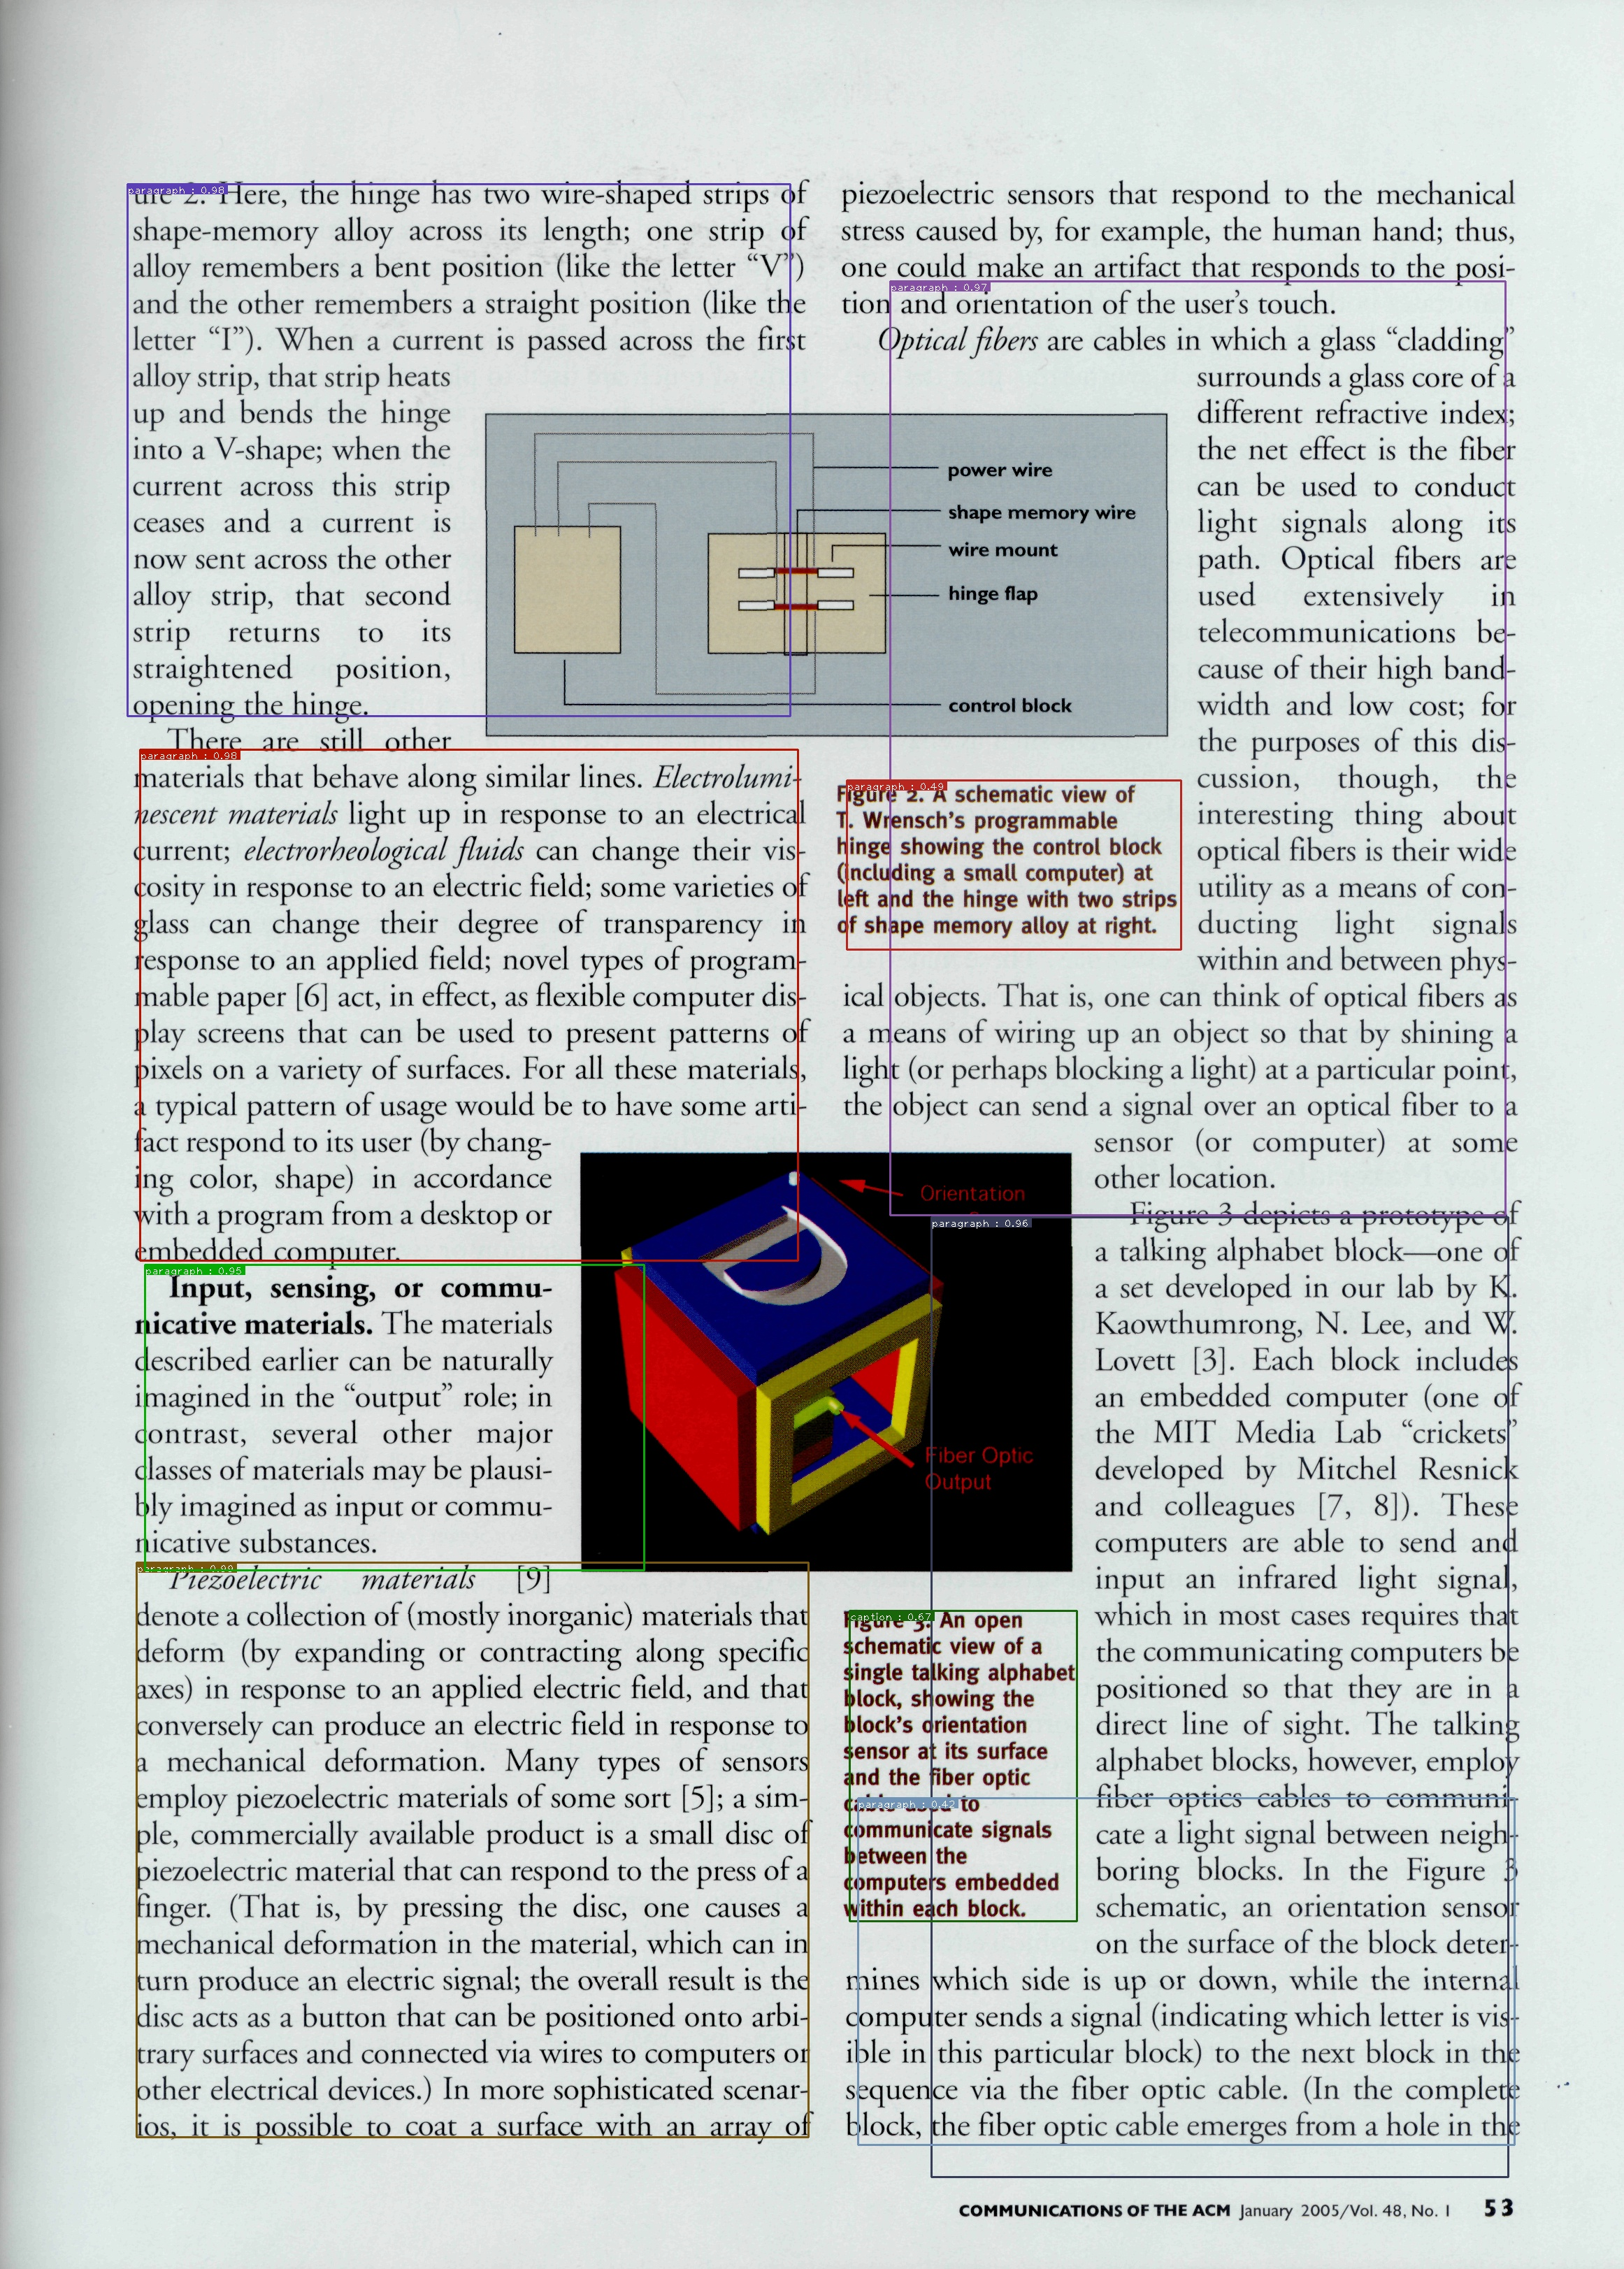

In [0]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/ship/test/input1.tif";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg')

In [0]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/ship/test/input2.tif";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg')

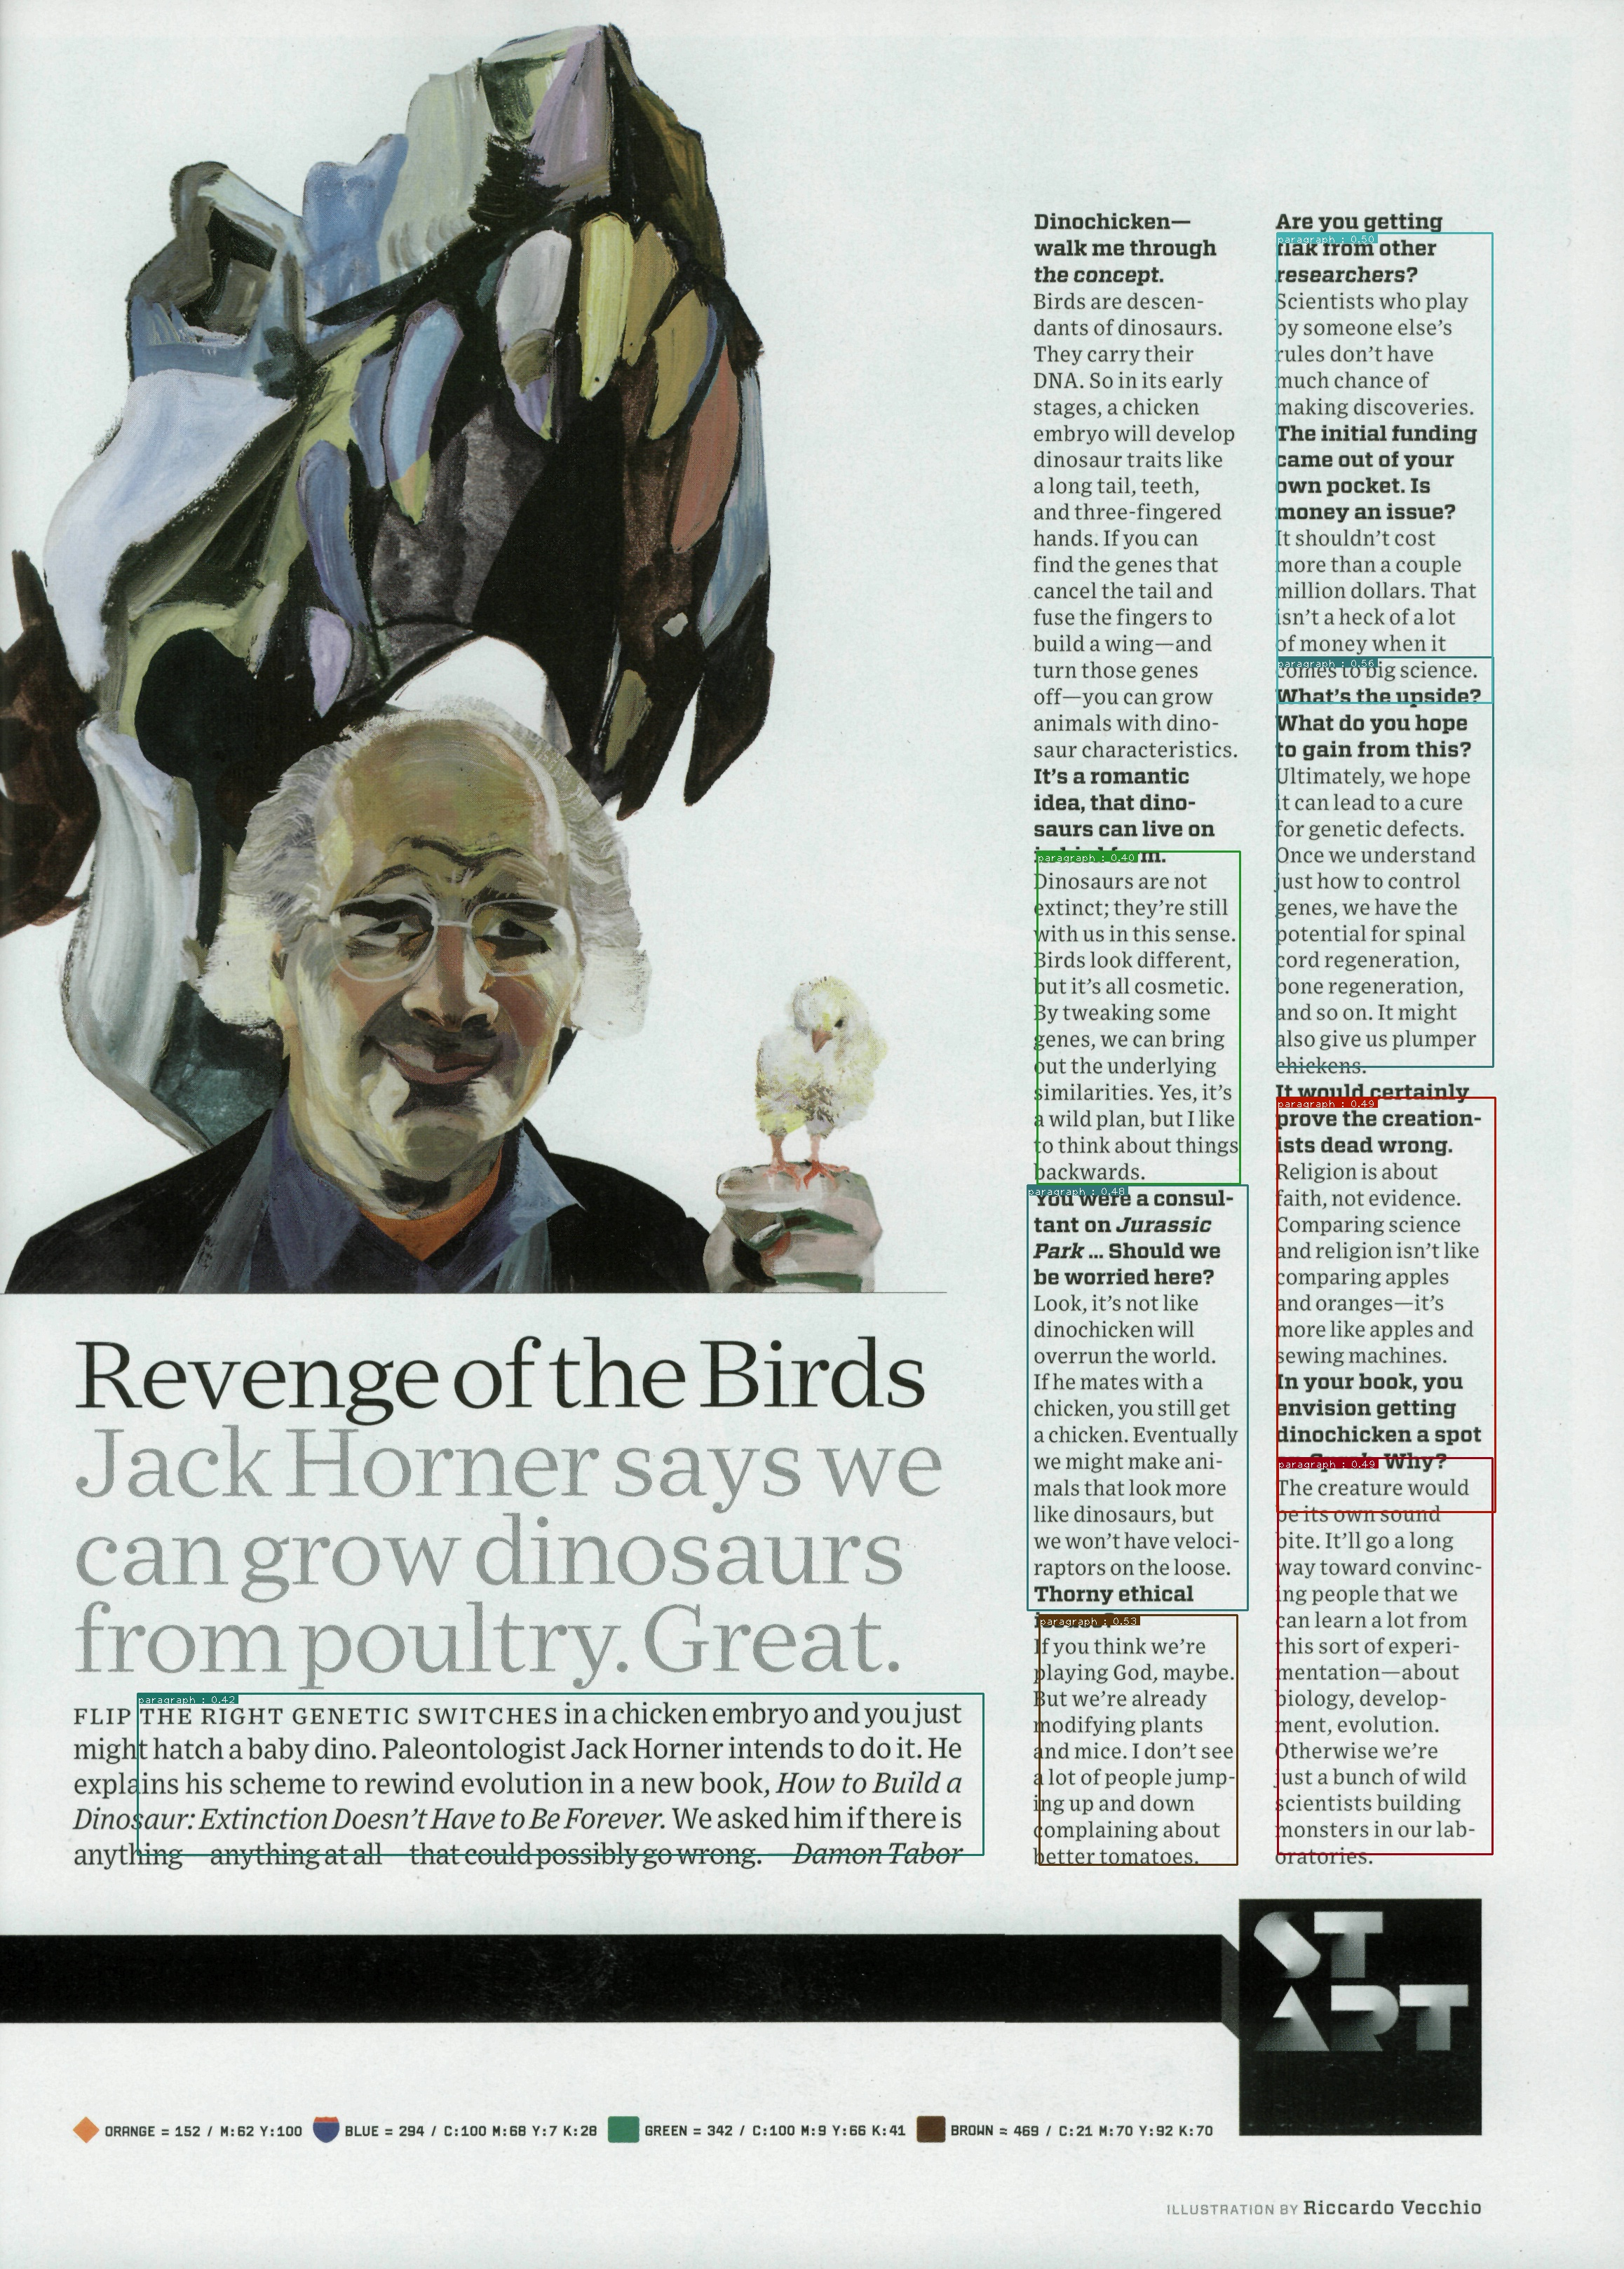

In [0]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/ship/test/input3.tif";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg')

In [0]:
!cp "/content/final_model.pt" "/content/drive/My Drive/"

In [0]:
os.path.exists('/content/final_model.pt')

True